In [2]:
import numpy as np
import pandas as pd
from datetime import datetime

In [4]:
dates = ["20240530", "20240531", "20240601", "20240602", "20240603", "20240604",]
date_times = [datetime.strptime(date, "%Y%m%d") for date in dates]

df = pd.DataFrame(index=["store1", "store2", "store3"], 
                  columns=date_times, 
                  data=np.array([[1, 5, 2, 6, 7, 0], [0, 5, 1, 8, 8, 1], [0, 3, 2, 0, 2, 1]]))

In [5]:
df

,2024-05-30,2024-05-31,2024-06-01,2024-06-02,2024-06-03,2024-06-04
store1,1,5,2,6,7,0
store2,0,5,1,8,8,1
store3,0,3,2,0,2,1


In [6]:
df.stack()

store1  2024-05-30    1
        2024-05-31    5
        2024-06-01    2
        2024-06-02    6
        2024-06-03    7
        2024-06-04    0
store2  2024-05-30    0
        2024-05-31    5
        2024-06-01    1
        2024-06-02    8
        2024-06-03    8
        2024-06-04    1
store3  2024-05-30    0
        2024-05-31    3
        2024-06-01    2
        2024-06-02    0
        2024-06-03    2
        2024-06-04    1
dtype: int32

In [134]:
def highlight_errors(val):
    color = 'red' if val == 1 else '#006400'
    return f"background-color: {color}"

In [135]:
df.style.apply(lambda x: x.map(highlight_errors))

<AxesSubplot:>

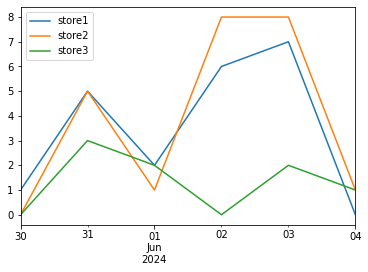

In [9]:
df.T.plot.line()

In [10]:
date = "20240530"
date_time = datetime.strptime(date, "%Y%m%d")
print(date_time)

2024-05-30 00:00:00


In [134]:
stores = ["store1", "store2", "store3"]
dates = ["20240530", "20240531", "20240601"]

index = pd.MultiIndex.from_product([stores, dates])
index

MultiIndex([('store1', '20240530'),
            ('store1', '20240531'),
            ('store1', '20240601'),
            ('store2', '20240530'),
            ('store2', '20240531'),
            ('store2', '20240601'),
            ('store3', '20240530'),
            ('store3', '20240531'),
            ('store3', '20240601')],
           )

In [161]:
fields = ["sales", "profits", "foot traffic"]

columns = fields
columns

['sales', 'profits', 'foot traffic']

In [162]:
data = [[1, 2, 3], [3, 0, 3], [4, 0, 3], [4, 1, 3], [5, 2, 3], [5, 4, 3], [6, 5, 3], [8, 2, 3], [9, 7, 3]]

In [163]:
df = pd.DataFrame(data, index=index, columns=columns)
df

sales  profits  foot traffic
store1 20240530      1        2             3
       20240531      3        0             3
       20240601      4        0             3
store2 20240530      4        1             3
       20240531      5        2             3
       20240601      5        4             3
store3 20240530      6        5             3
       20240531      8        2             3
       20240601      9        7             3

In [164]:
# Removes the oldest date from the df
df = df.drop(index=df.index.tolist()[0][1], level=1)

In [165]:
df

sales  profits  foot traffic
store1 20240531      3        0             3
       20240601      4        0             3
store2 20240531      5        2             3
       20240601      5        4             3
store3 20240531      8        2             3
       20240601      9        7             3

In [166]:
new_row = pd.DataFrame({'sales': [18], 'profits': [9], 'foot traffic' : [2]}, index=pd.MultiIndex.from_tuples([('store1', '20240602')]))
new_row

,,sales,profits,foot traffic
store1,20240602,18,9,2


In [167]:
df = pd.concat([df, new_row])

In [168]:
df

sales  profits  foot traffic
store1 20240531      3        0             3
       20240601      4        0             3
store2 20240531      5        2             3
       20240601      5        4             3
store3 20240531      8        2             3
       20240601      9        7             3
store1 20240602     18        9             2

20240531     3.0
20240601     4.0
20240602    50.0
Name: sales, dtype: float64

In [185]:
new_data = {
    "store1": {"20240602": [5, 6, 7]},
    "store2": {"20240602": [4, 3, 8]},
    "store3": {"20240602": [2, 0, 9]}
}

In [186]:
for store, values in new_data.items():
    last_entry_index = df.loc[store].index[-1]
    for date, entry in values.items():
        df.loc[(store, date), :] = entry

print(df)

                 sales  profits  foot traffic
store1 20240531    3.0      0.0           3.0
       20240601    4.0      0.0           3.0
store2 20240531    5.0      2.0           3.0
       20240601    5.0      4.0           3.0
store3 20240531    8.0      2.0           3.0
       20240601    9.0      7.0           3.0
store1 20240602    5.0      6.0           7.0
store2 20240602    4.0      3.0           8.0
store3 20240602    2.0      0.0           9.0


In [187]:
df

sales  profits  foot traffic
store1 20240531    3.0      0.0           3.0
       20240601    4.0      0.0           3.0
store2 20240531    5.0      2.0           3.0
       20240601    5.0      4.0           3.0
store3 20240531    8.0      2.0           3.0
       20240601    9.0      7.0           3.0
store1 20240602    5.0      6.0           7.0
store2 20240602    4.0      3.0           8.0
store3 20240602    2.0      0.0           9.0

In [188]:
print(df)

                 sales  profits  foot traffic
store1 20240531    3.0      0.0           3.0
       20240601    4.0      0.0           3.0
store2 20240531    5.0      2.0           3.0
       20240601    5.0      4.0           3.0
store3 20240531    8.0      2.0           3.0
       20240601    9.0      7.0           3.0
store1 20240602    5.0      6.0           7.0
store2 20240602    4.0      3.0           8.0
store3 20240602    2.0      0.0           9.0


## MultiIndex DataFrames

In [ ]:
# Series: 1d arrays
# DataFrames: Array of Series

In [ ]:
# DatsFrames: Indexes and Columns
# Indexes allow us to index columns
# Easy way to look things up

In [ ]:
# MultiIndex DataFrame: Data that is unique by multiple indices
# Used when data is hierarchical

In [174]:
stocks = pd.read_csv('http://bit.ly/smallstocks')
stocks

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT
3,2016-10-04,113.00,29736800,AAPL
4,2016-10-04,57.24,20085900,MSFT
5,2016-10-04,31.35,18460400,CSCO
6,2016-10-05,57.64,16726400,MSFT
7,2016-10-05,31.59,11808600,CSCO
8,2016-10-05,113.05,21453100,AAPL


,Date,Close,Volume,Symbol
0,2016-10-05,57.64,16726400,MSFT
1,2016-10-05,31.59,11808600,CSCO
2,2016-10-05,113.05,21453100,AAPL


In [7]:
stocks.groupby("Symbol").Close.mean()

Symbol
AAPL    112.856667
CSCO     31.480000
MSFT     57.433333
Name: Close, dtype: float64

In [177]:
ser = stocks.groupby(['Symbol', 'Date']).Close.mean()
ser

Symbol  Date      
AAPL    2016-10-05    113.05
CSCO    2016-10-05     31.59
MSFT    2016-10-05     57.64
Name: Close, dtype: float64

In [49]:
ser.index

MultiIndex([('AAPL', '2016-10-03'),
            ('AAPL', '2016-10-04'),
            ('AAPL', '2016-10-05'),
            ('CSCO', '2016-10-03'),
            ('CSCO', '2016-10-04'),
            ('CSCO', '2016-10-05'),
            ('MSFT', '2016-10-03'),
            ('MSFT', '2016-10-04'),
            ('MSFT', '2016-10-05')],
           names=['Symbol', 'Date'])

<AxesSubplot:xlabel='Date'>

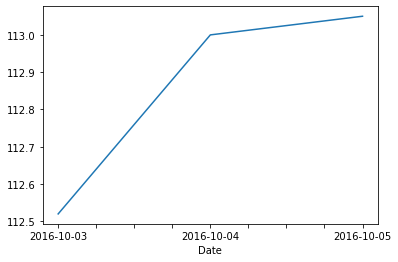

In [133]:
df2 = ser.unstack()
df2.T['AAPL'].plot.line()

In [178]:
df = pd.DataFrame(ser)
df

,,Close
Symbol,Date,
AAPL,2016-10-05,113.05
CSCO,2016-10-05,31.59
MSFT,2016-10-05,57.64


<AxesSubplot:xlabel='Date'>

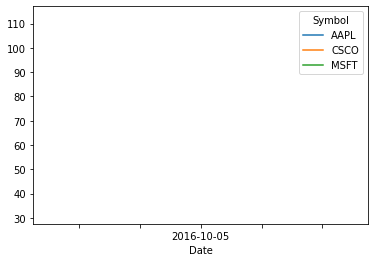

In [179]:
df = pd.DataFrame(ser)
df = df.unstack(level=1)
df.replace(112.52, 0, inplace=True)
# Plots a single company
#df["Close"].loc['AAPL'].T.plot.line()

# Plots all companies
df["Close"].T.plot.line()

In [113]:
df

Close                      
Date   2016-10-03 2016-10-04 2016-10-05
Symbol                                 
AAPL         0.00     113.00     113.05
CSCO        31.50      31.35      31.59
MSFT        57.42      57.24      57.64

In [124]:
df['Close'].T.columns

Index(['AAPL', 'CSCO', 'MSFT'], dtype='object', name='Symbol')

In [125]:
close_df = stocks.pivot_table(values='Close', index='Symbol', columns='Date')
close_df

Date,2016-10-03,2016-10-04,2016-10-05
Symbol,,,
AAPL,112.52,113.00,113.05
CSCO,31.50,31.35,31.59
MSFT,57.42,57.24,57.64


In [18]:
ser.loc['AAPL', '2016-10-03']

112.52

In [19]:
ser.loc[:, '2016-10-03']

Symbol
AAPL    112.52
CSCO     31.50
MSFT     57.42
Name: Close, dtype: float64

In [44]:
stock_df.index

Index(['AAPL', 'CSCO', 'MSFT'], dtype='object', name='Symbol')